### Problem Statement : 


Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


**About Dataset**

The Chennai_House_Predictions data set is a collection of 7109 houses records from 2004 to 2015 with 21 features. It contains attributes like AREA ,INT_SQFT', DATE_SALE, DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE UTILITY_AVAIL, STREET,MZZONE, SALES_PRICE etc

**MAIN OBJECTIVE**

The main objective is to predict Sales Price using various independent features provided in the dataset. Here, following Regression method are used :
* Vanila Linear Regression 
* Lasso
* Ridge
* KNN Regressor
* Decision Tree
* Bagging
* Boosting

Performance of each regression is evaluated using __R2_score__. 

**INDEX**

* Import Libraries
* Read Data
* Data Cleaning and EDA
* Data Prepartion
* Model Training
* Conclusion

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

### Read Data

In [2]:
df=pd.read_csv("train-chennai-sale.csv")

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [6]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [7]:
df=df.drop(["PRT_ID"],axis=1)

In [8]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [9]:
df.shape

(7109, 21)

In [10]:
print("Number of  rows : ",df.shape[0])
print("Number of  columns: ",df.shape[1])

Number of  rows :  7109
Number of  columns:  21


In [11]:
corr=df.corr()
corr[['SALES_PRICE']]

,SALES_PRICE
INT_SQFT,0.612125
DIST_MAINROAD,0.018783
N_BEDROOM,0.330999
N_BATHROOM,0.108884
N_ROOM,0.602760
QS_ROOMS,0.021967
QS_BATHROOM,-0.011377
QS_BEDROOM,0.018804
QS_OVERALL,0.020556
REG_FEE,0.878148


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  REG_FEE 

### Data Cleaning and EDA

#### 1.AREA

In [13]:
df["AREA"].isnull().sum()

0

In [14]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [15]:
df["AREA"]=df["AREA"].replace({'Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','Velchery':'Velachery','Chrompt':'Chormpet','Chrmpet':'Chormpet','Chrompet':'Chormpet','KKNagar':'KK Nagar','TNagar':'T Nagar'})


In [16]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chormpet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [17]:
df["AREA"].value_counts()

Chormpet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [18]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


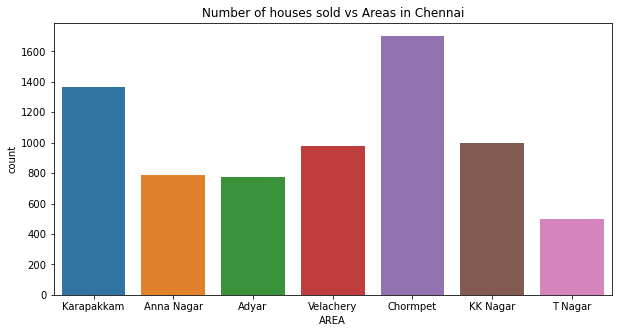

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df["AREA"]).set_title('Number of houses sold vs Areas in Chennai')
plt.show()

Number of houses sold in Chrompet is higher when compared other area. Least number of houses sold in T Nagar.

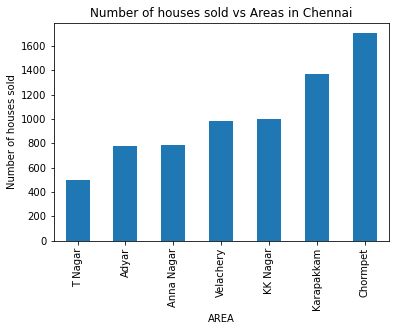

In [20]:
df.groupby("AREA")['SALES_PRICE'].count().sort_values(ascending=True).plot.bar()
plt.title('Number of houses sold vs Areas in Chennai')
plt.ylabel('Number of houses sold')
plt.show()

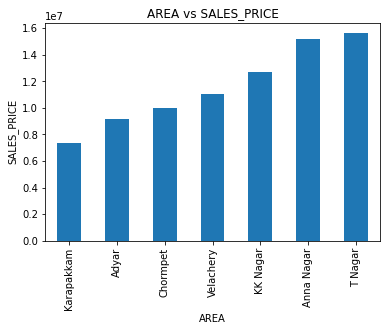

In [21]:
df.groupby("AREA")['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()
plt.title('AREA vs SALES_PRICE')
plt.ylabel('SALES_PRICE')
plt.show()

Average sales price is highest in T Nagar 

In [22]:
df['AREA']=df['AREA'].map({'Karapakkam':0,'Adyar':1,'Chormpet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

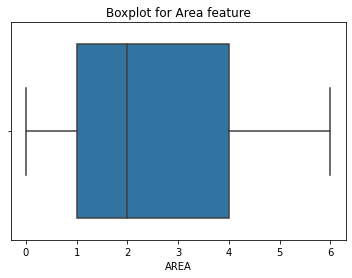

In [23]:
sns.boxplot(df['AREA']).set_title('Boxplot for Area feature')
plt.show()

No outliers.

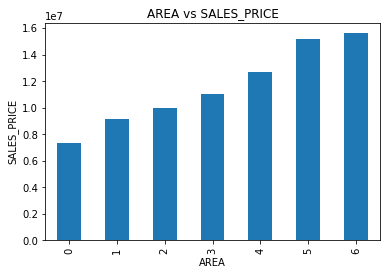

In [24]:
df.groupby("AREA")['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()
plt.title('AREA vs SALES_PRICE')
plt.ylabel('SALES_PRICE')
plt.show()

In [25]:
df[['AREA','SALES_PRICE']].corr()

,AREA,SALES_PRICE
AREA,1.000000,0.694149
SALES_PRICE,0.694149,1.000000


There is a linear relationship between Area and Sales Price


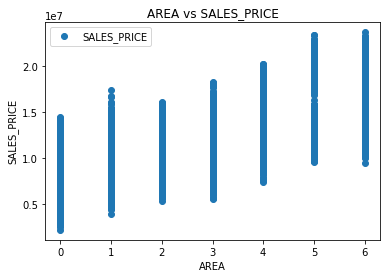

In [26]:
df.plot(x='AREA', y='SALES_PRICE', style='o')
plt.title('AREA vs SALES_PRICE')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

Sales prices range in T Nagar and Anna Nagar is almost similar and costly when compared to other areas

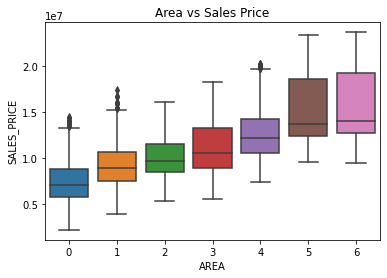

In [27]:
sns.boxplot(x='AREA',y='SALES_PRICE',data=df).set_title('Area vs Sales Price')
plt.show()

Here we can see the range of sales price for each area.Where, area's like Karapakkam having very affordable range of prices constrast to that Anna Nagar and T Nagar range of sales prices are at higher end

#### 2. INT_SQFT

In [28]:
df['INT_SQFT'].isna().sum()

0

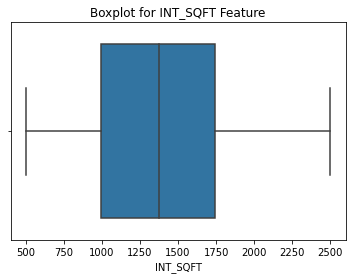

In [29]:
sns.boxplot(df['INT_SQFT']).set_title('Boxplot for INT_SQFT Feature')
plt.show()

No outliers present in this feature

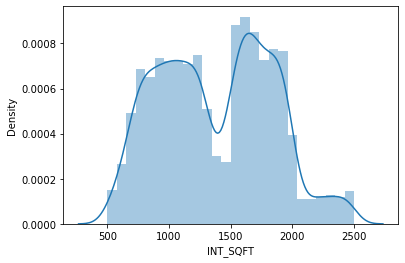

In [30]:
sns.distplot(df['INT_SQFT'])
plt.show()

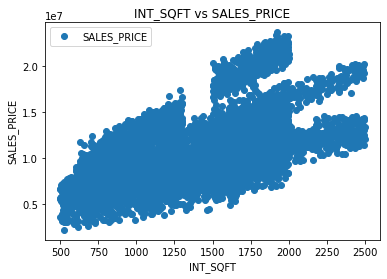

In [31]:
df.plot(x='INT_SQFT', y='SALES_PRICE', style='o')
plt.title('INT_SQFT vs SALES_PRICE')
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.show()

In [32]:
df[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


There is Linear Relationship between INT_SQFT and SALES_PRICE

#### 3. DATE_SALE

In [33]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])

In [34]:
df['DATE_SALE']=pd.DatetimeIndex(df['DATE_SALE']).year

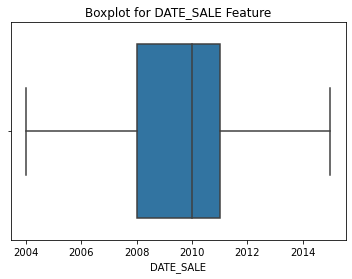

In [35]:
sns.boxplot(df['DATE_SALE']).set_title('Boxplot for DATE_SALE Feature')
plt.show()

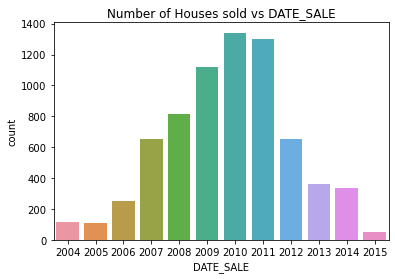

In [36]:
sns.countplot(df['DATE_SALE']).set_title('Number of Houses sold vs DATE_SALE')
plt.show()

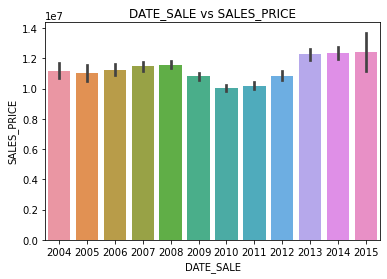

In [37]:
sns.barplot(x=df['DATE_SALE'],y=df['SALES_PRICE']).set_title('DATE_SALE vs SALES_PRICE')
plt.show()

There was sight dip in sales price from year 2009 to 2012

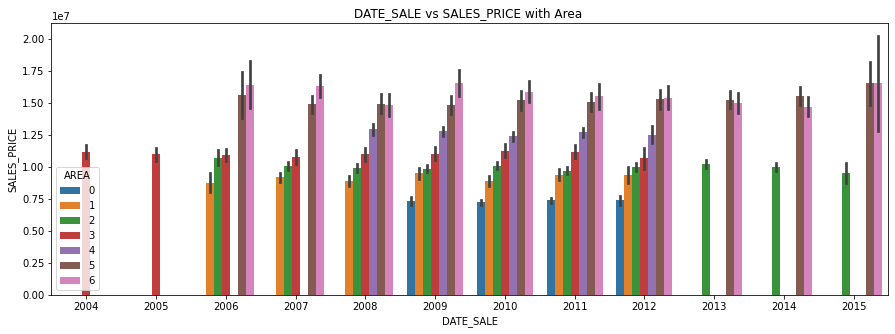

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x='DATE_SALE',y='SALES_PRICE',hue='AREA',data=df).set_title('DATE_SALE vs SALES_PRICE with Area ')
plt.show() 

Only houses in Velachery were sold in year 2004 and 2005. No houses were sold in Velachery in the year 2013,2014 and 2015.

Anna Nagar and T Nagar sales prices are high since 2006.

Houses from all areas were between the year 2009 to 2012.

In [39]:
df[['DATE_SALE','SALES_PRICE']].corr()

,DATE_SALE,SALES_PRICE
DATE_SALE,1.000000,0.000906
SALES_PRICE,0.000906,1.000000


There is no linear relationship between DATE_SALE and SALES_PRICE. Hence transformation is required

In [40]:
df['YEAR_SALE']=(df['DATE_SALE']**3)

In [41]:
df[['YEAR_SALE','SALES_PRICE']].corr()

,YEAR_SALE,SALES_PRICE
YEAR_SALE,1.000000,0.001093
SALES_PRICE,0.001093,1.000000


No linear relationship

#### 4. DIST_MAINROAD 

In [42]:
df['DIST_MAINROAD'].isnull().sum()

0

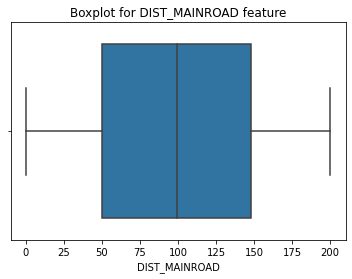

In [43]:
sns.boxplot(df['DIST_MAINROAD']).set_title('Boxplot for DIST_MAINROAD feature')
plt.show()

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

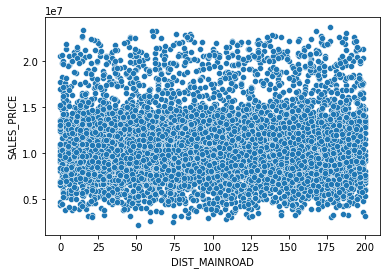

In [44]:
sns.scatterplot(df['DIST_MAINROAD'],df['SALES_PRICE'])

In [45]:
df[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


In [46]:
df['DIST_MAINROAD']=(df['DIST_MAINROAD']**3)

In [47]:
df[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.022528
SALES_PRICE,0.022528,1.000000


There is no Linear Relationship between DIST_MAINROAD and SALES_PRICE

#### 5. N_BEDROOM

In [48]:
df['N_BEDROOM'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [49]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [50]:
df['N_BEDROOM'].isnull().sum()

1

In [51]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [52]:
df['N_BEDROOM'].mean()

1.6370287000562747

In [53]:
df['N_BEDROOM'].median()

1.0

In [54]:
df['N_BEDROOM'].fillna (df['N_BEDROOM'].mode()[0],inplace=True)

In [55]:
df['N_BEDROOM'].isna().sum()

0

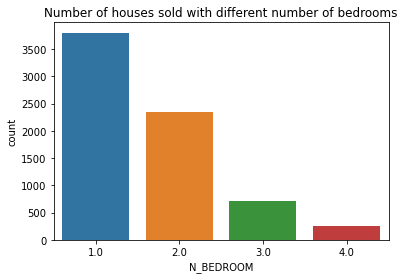

In [56]:
sns.countplot(df['N_BEDROOM']).set_title('Number of houses sold with different number of bedrooms')
plt.show()

Number of 1BHK is greater. Least number of 4BHK houses.

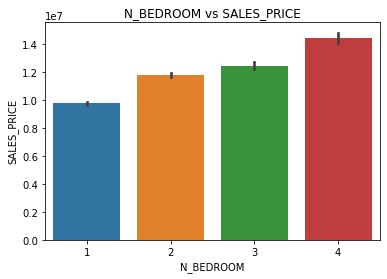

In [214]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df).set_title('N_BEDROOM vs SALES_PRICE')
plt.show()

Number of sales price increases with number of bedrooms

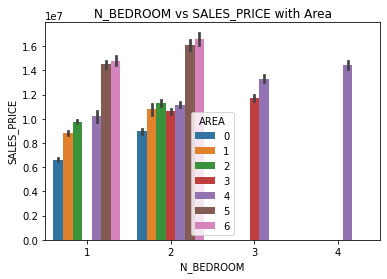

In [215]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',hue='AREA',data=df).set_title('N_BEDROOM vs SALES_PRICE with Area')
plt.show()

KK Nagar has only 4 Bedroom houses.

All areas have 2 Bedroom houses.

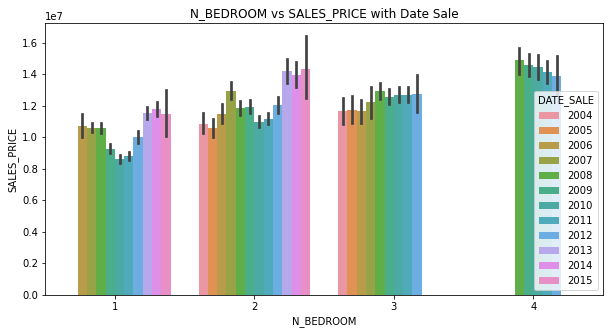

In [216]:
plt.figure(figsize=(10,5))
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',hue='DATE_SALE',data=df).set_title('N_BEDROOM vs SALES_PRICE with Date Sale')
plt.show()

2007 to 2012 4BHK houses were sold.

2BHK houses are sold in every year and in all 7 mentioned areas

In [60]:
df[['N_BEDROOM','SALES_PRICE']].corr()

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330987
SALES_PRICE,0.330987,1.000000


There is a low linear relationshp between the data , hence transformation is done to increase the correlation.

In [61]:
#df['N_BEDROOM']=np.log(df['N_BEDROOM'])

In [62]:
#df[['N_BEDROOM','SALES_PRICE']].corr()

In [63]:
df['N_BEDROOM']=df['N_BEDROOM'].astype('int64')

#### 6. N_BATHROOM

In [64]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [65]:
df['N_BATHROOM'].isna().sum()

5

In [66]:
df['N_BATHROOM'].median()

1.0

In [67]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [68]:
df['N_BATHROOM'].isna().sum()

0

In [69]:
df['N_BATHROOM']=df['N_BATHROOM'].astype('int64')

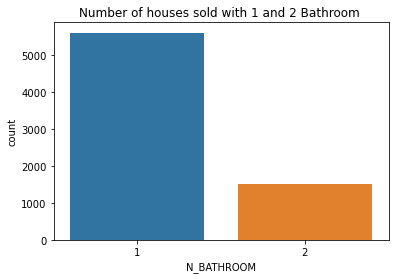

In [70]:
sns.countplot(df['N_BATHROOM']).set_title('Number of houses sold with 1 and 2 Bathroom ')
plt.show()

More than 75% of houses sold have 1 Bathroom

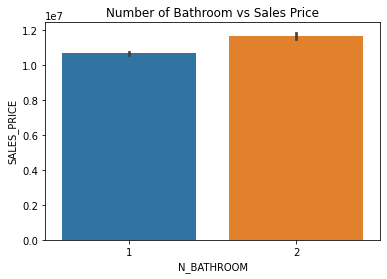

In [71]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df).set_title('Number of Bathroom vs Sales Price')
plt.show()

Average sales price of 2 Bathroom houses are more than 1 Bathroom houses

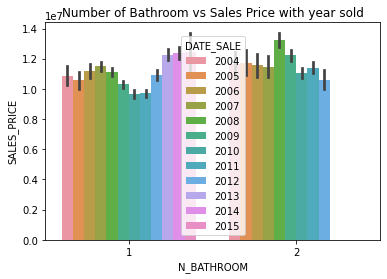

In [72]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',hue='DATE_SALE',data=df).set_title('Number of Bathroom vs Sales Price with year sold')
plt.show()

After 2013, no houses with 2 bathroom were sold

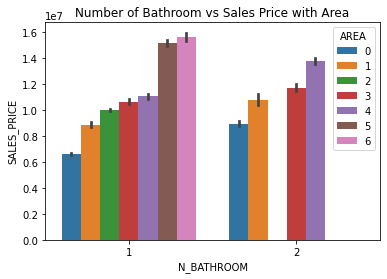

In [73]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',hue='AREA',data=df).set_title('Number of Bathroom vs Sales Price with Area')
plt.show()

No 2 Bathroom houses in Chormpet, Anna Nagar and T Nagar.

In [74]:
df[['N_BATHROOM','SALES_PRICE']].corr()

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


Very low linear relationship in data. 

#### 7.N_ROOM

In [75]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [76]:
df['N_ROOM'].isna().sum()

0

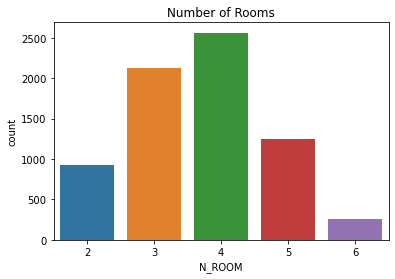

In [77]:
sns.countplot(df['N_ROOM']).set_title("Number of Rooms")
plt.show()

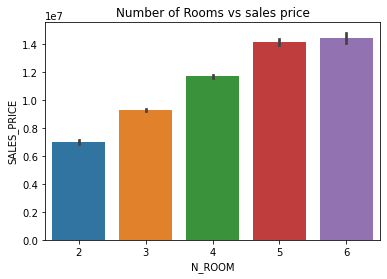

In [78]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df).set_title("Number of Rooms vs sales price")
plt.show()

As number of rooms increases, sales price also increases.

<AxesSubplot:xlabel='N_ROOM'>

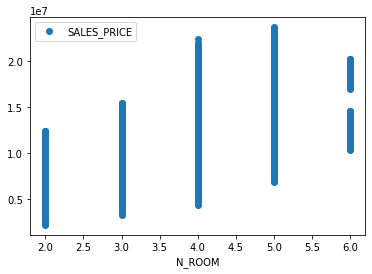

In [79]:
df.plot(x='N_ROOM',y='SALES_PRICE',style='o')

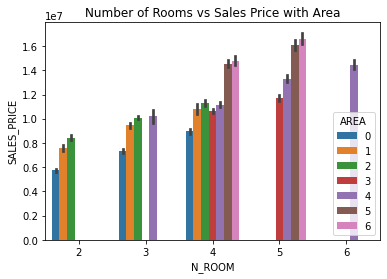

In [80]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',hue='AREA',data=df).set_title("Number of Rooms vs Sales Price with Area")
plt.show()

KK Nagar only has 6 rooms houses.

All areas have 4 room houses.

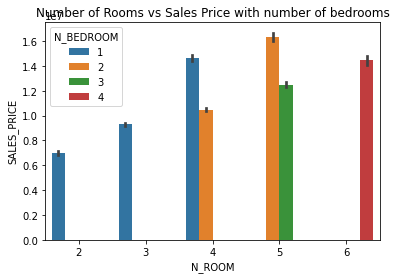

In [81]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',hue='N_BEDROOM',data=df).set_title("Number of Rooms vs Sales Price with number of bedrooms")
plt.show()

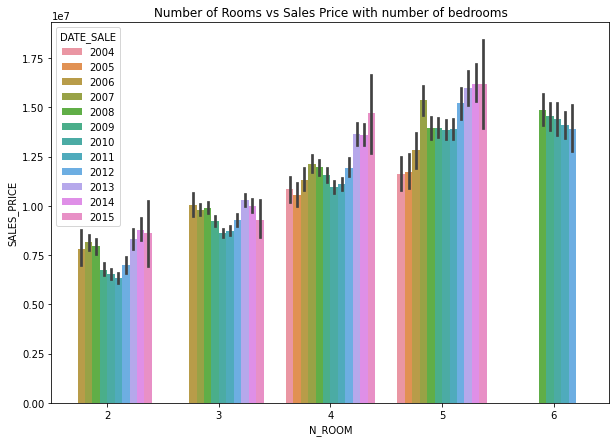

In [82]:
plt.figure(figsize=(10,7))
sns.barplot(x='N_ROOM',y='SALES_PRICE',hue='DATE_SALE',data=df).set_title("Number of Rooms vs Sales Price with number of bedrooms")
plt.show()

#### 8. SALE_COND

In [83]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [84]:
df['SALE_COND']=df['SALE_COND'].replace({'AdjLand':'Adj Land','AbNormal':'Ab Normal','Partiall':'Partial','PartiaLl':'Partial'})

In [85]:
df['SALE_COND'].value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

In [86]:
df['SALE_COND'].isnull().sum()

0

<AxesSubplot:xlabel='SALE_COND', ylabel='count'>

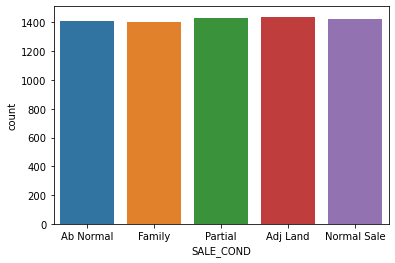

In [87]:
sns.countplot(df['SALE_COND'])

In [88]:
#df['SALE_COND']=df['SALE_COND'].sort_values(ascending=True)

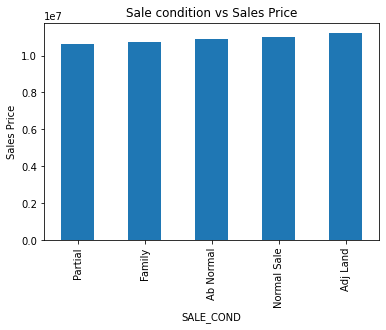

In [89]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values().plot.bar()
plt.title('Sale condition vs Sales Price')
plt.ylabel("Sales Price")
plt.show()

In [90]:
df['SALE_COND']=df['SALE_COND'].map({'Partial':0,'Family':1,'Ab Normal':2,'Normal Sale':3,'Adj Land':4})

In [91]:
df[['SALE_COND','SALES_PRICE']].corr()

,SALE_COND,SALES_PRICE
SALE_COND,1.00000,0.05437
SALES_PRICE,0.05437,1.00000


In [92]:
df['SALE_COND_1']=np.sqrt(df['SALE_COND'])

In [93]:
df[['SALE_COND_1','SALES_PRICE']].corr()

,SALE_COND_1,SALES_PRICE
SALE_COND_1,1.000000,0.051404
SALES_PRICE,0.051404,1.000000


The Linear relationship between the data is low even after some transformation.

#### 9. PARK_FACIL

In [94]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [95]:
df['PARK_FACIL']=df['PARK_FACIL'].replace({'Noo':'No'})

In [96]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

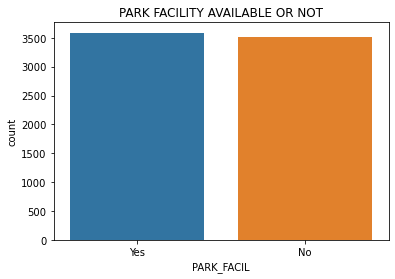

In [97]:
sns.countplot(df['PARK_FACIL']).set_title('PARK FACILITY AVAILABLE OR NOT')
plt.show()

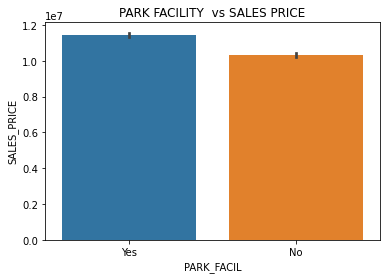

In [98]:
sns.barplot(df['PARK_FACIL'],df['SALES_PRICE']).set_title('PARK FACILITY  vs SALES PRICE')
plt.show()

In [99]:
le=LabelEncoder()

In [100]:
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])

In [101]:
df['PARK_FACIL'].value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [102]:
df[['PARK_FACIL','SALES_PRICE']].corr()

,PARK_FACIL,SALES_PRICE
PARK_FACIL,1.000000,0.146428
SALES_PRICE,0.146428,1.000000


There is very low linear relationship between data.

#### 10. DATE_BUILD

In [103]:
df['DATE_BUILD'].isna().sum()

0

In [104]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

In [105]:
df['DATE_BUILD']=pd.DatetimeIndex(df['DATE_BUILD']).year

In [106]:
df['Depreciation_Year']=df['DATE_SALE']-df['DATE_BUILD']

In [107]:
df['Depreciation_Year']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: Depreciation_Year, Length: 7109, dtype: int64

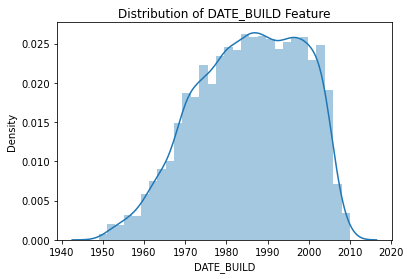

In [108]:
sns.distplot(df['DATE_BUILD']).set_title('Distribution of DATE_BUILD Feature')
plt.show()

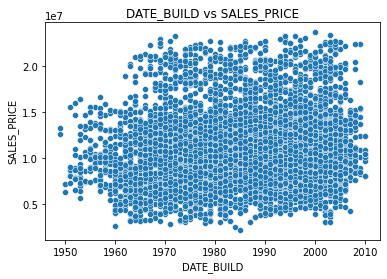

In [109]:
sns.scatterplot(df['DATE_BUILD'],df['SALES_PRICE']).set_title('DATE_BUILD vs SALES_PRICE')
plt.show()

In [110]:
df[['DATE_BUILD','SALES_PRICE']].corr()

,DATE_BUILD,SALES_PRICE
DATE_BUILD,1.000000,0.116043
SALES_PRICE,0.116043,1.000000


In [111]:
df['DATE_BUILD_1']=np.log(df['DATE_BUILD'])

In [112]:
df[['DATE_BUILD_1','SALES_PRICE']].corr()

,DATE_BUILD_1,SALES_PRICE
DATE_BUILD_1,1.000000,0.116135
SALES_PRICE,0.116135,1.000000


There is very low relationship between data.

#### 11.Depreciation_Year

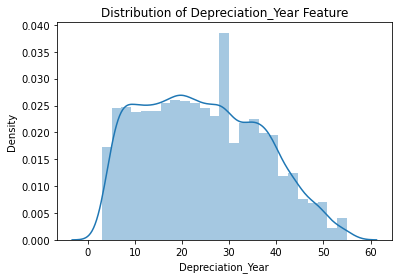

In [113]:
sns.distplot(df['Depreciation_Year']).set_title('Distribution of Depreciation_Year Feature')
plt.show()

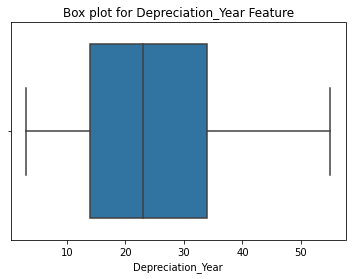

In [114]:
sns.boxplot(df['Depreciation_Year']).set_title('Box plot for Depreciation_Year Feature')
plt.show()

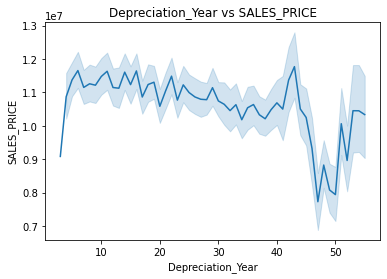

In [115]:
sns.lineplot(df['Depreciation_Year'],df['SALES_PRICE']).set_title('Depreciation_Year vs SALES_PRICE')
plt.show()

There is sudden dip in sales price for the houses having depreciation year above 45 years

In [116]:
df[['Depreciation_Year','SALES_PRICE']].corr()

,Depreciation_Year,SALES_PRICE
Depreciation_Year,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


In [117]:
df['Depreciation_Year_1']=(df['Depreciation_Year']**3)

In [118]:
df[['Depreciation_Year_1','SALES_PRICE']].corr()

,Depreciation_Year_1,SALES_PRICE
Depreciation_Year_1,1.000000,-0.124077
SALES_PRICE,-0.124077,1.000000


There is very low linear relationship between data

#### 12. BUILDTYPE  

In [119]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [120]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'})

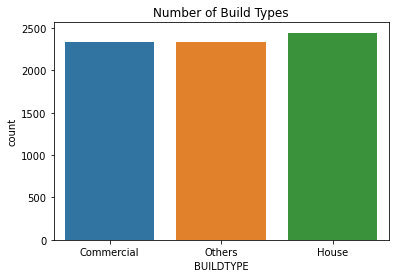

In [121]:
sns.countplot(df['BUILDTYPE']).set_title('Number of Build Types')
plt.show()

Build type doesnt affect much of the sales count

In [122]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

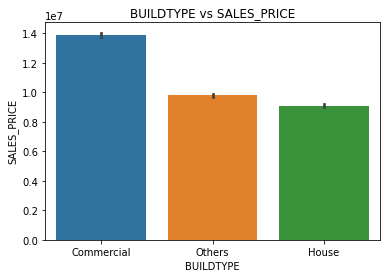

In [123]:
sns.barplot(df['BUILDTYPE'],df['SALES_PRICE']).set_title('BUILDTYPE vs SALES_PRICE')
plt.show()

Commericial Buildings sales price are higher than other two.

In [124]:
df['BUILDTYPE']=df['BUILDTYPE'].map({'Commercial':0,'Others':1,'House':2})

In [125]:
df[['BUILDTYPE','SALES_PRICE']].corr()

,BUILDTYPE,SALES_PRICE
BUILDTYPE,1.000000,-0.515717
SALES_PRICE,-0.515717,1.000000


In [126]:
df['BUILDTYPE']=np.sqrt(df['BUILDTYPE'])

In [127]:
df[['BUILDTYPE','SALES_PRICE']].corr()

,BUILDTYPE,SALES_PRICE
BUILDTYPE,1.000000,-0.550097
SALES_PRICE,-0.550097,1.000000


#### 13. UTILITY_AVAIL

In [128]:
df['UTILITY_AVAIL'].isna().sum()

0

In [129]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [130]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'})

In [131]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

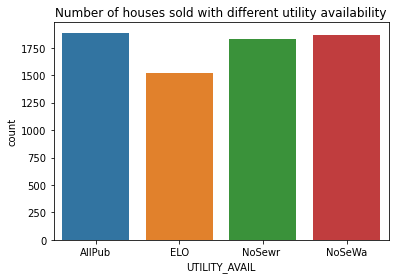

In [132]:
sns.countplot(df['UTILITY_AVAIL']).set_title('Number of houses sold with different utility availability')
plt.show()

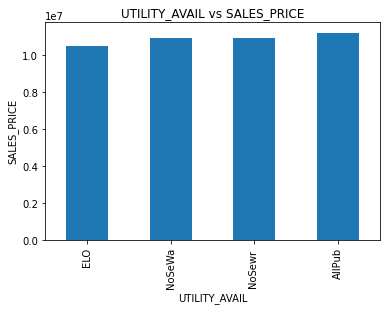

In [133]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.ylabel('SALES_PRICE')
plt.show()

In [134]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map({'ELO':1,'NoSeWa':2,'NoSewr ':3,'AllPub':4})

In [135]:
df['UTILITY_AVAIL'].isna().sum()

0

In [136]:
df[['UTILITY_AVAIL','SALES_PRICE']].corr()

,UTILITY_AVAIL,SALES_PRICE
UTILITY_AVAIL,1.000000,0.064418
SALES_PRICE,0.064418,1.000000


In [137]:
df['UTILITY_AVAIL_1']=np.sqrt(df['UTILITY_AVAIL'])

In [138]:
df[['UTILITY_AVAIL_1','SALES_PRICE']].corr()

,UTILITY_AVAIL_1,SALES_PRICE
UTILITY_AVAIL_1,1.000000,0.065256
SALES_PRICE,0.065256,1.000000


There is very very low linear relationship.

#### 14. STREET

In [139]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [140]:
df['STREET']=df['STREET'].replace({'NoAccess':'No Access','Pavd':'Paved'})

In [141]:
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

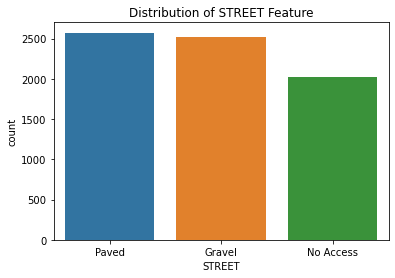

In [142]:
sns.countplot(df['STREET']).set_title('Distribution of STREET Feature')
plt.show()

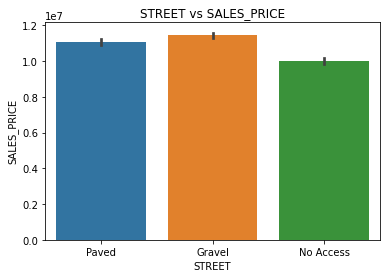

In [143]:
sns.barplot(df['STREET'],df['SALES_PRICE']).set_title('STREET vs SALES_PRICE')
plt.show()

In [144]:
df['STREET']=df['STREET'].map({'Paved':1,'Gravel':2,'No Access':3})

In [145]:
df[['STREET','SALES_PRICE']].corr()

,STREET,SALES_PRICE
STREET,1.000000,-0.103718
SALES_PRICE,-0.103718,1.000000


There is very low linear relationship between data.

#### 15. MZZONE 

In [146]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [147]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [148]:
df['MZZONE'].isna().sum()

0

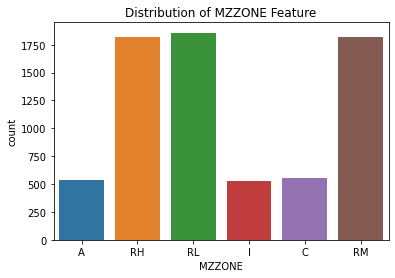

In [149]:
sns.countplot(df['MZZONE']).set_title('Distribution of MZZONE Feature')
plt.show()

Residential zones sales are higher than commerical

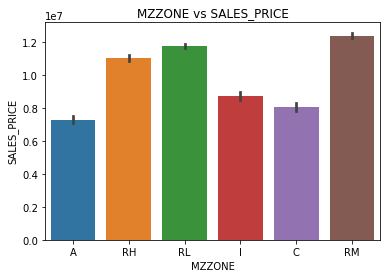

In [150]:
sns.barplot(df['MZZONE'],df['SALES_PRICE']).set_title('MZZONE vs SALES_PRICE')
plt.show()

Text(0, 0.5, 'SALES_PRICE')

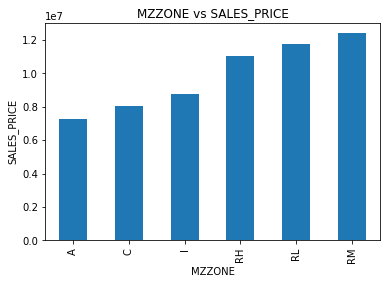

In [151]:
df.groupby('MZZONE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()
plt.title('MZZONE vs SALES_PRICE')
plt.ylabel('SALES_PRICE')

In [152]:
df['MZZONE']=df['MZZONE'].map({'A':1,'C':2,'I':3,'RH':4,'RL':5,'RM':6})

In [153]:
df[['MZZONE','SALES_PRICE']].corr()

,MZZONE,SALES_PRICE
MZZONE,1.000000,0.427789
SALES_PRICE,0.427789,1.000000


There is a linear relationship between the data.

In [154]:
corr=df.corr()

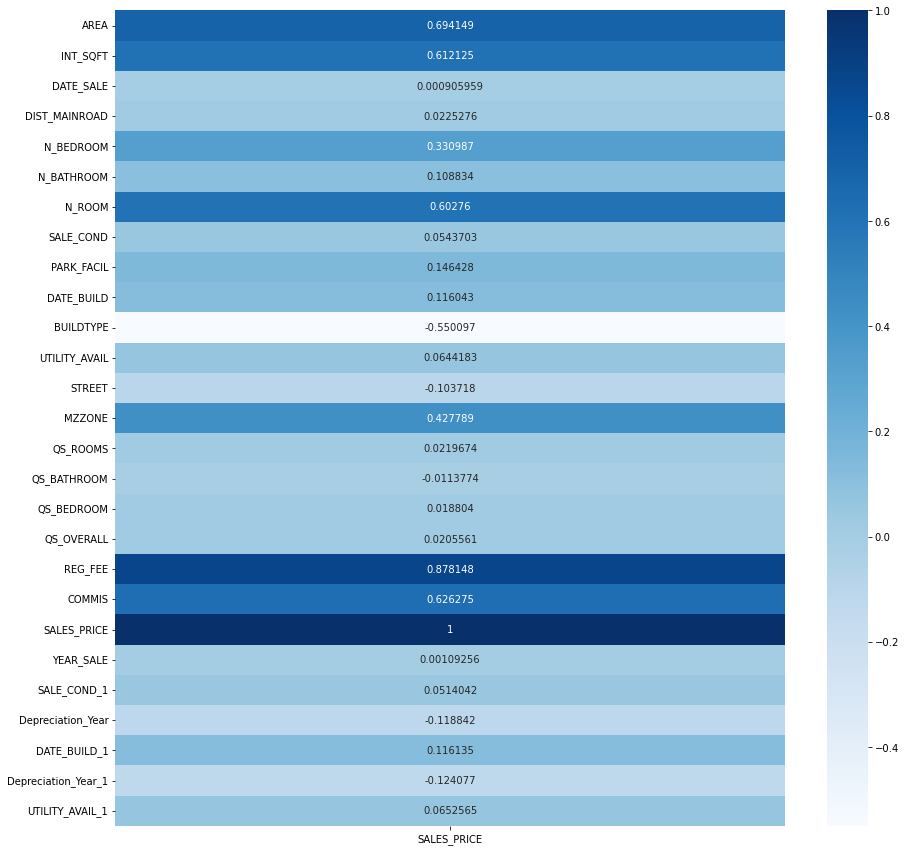

In [155]:
plt.figure(figsize=(15,15))
sns.heatmap(corr[['SALES_PRICE']],cmap='Blues',annot=True,cbar=True,fmt='g')
plt.show()

### Data Preparation

In [156]:
X=df.drop(['DATE_SALE','DATE_BUILD','STREET','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE','YEAR_SALE','SALE_COND_1','DATE_BUILD_1','Depreciation_Year_1','UTILITY_AVAIL_1'],axis=1)

In [157]:
corr[['SALES_PRICE']]

,SALES_PRICE
AREA,0.694149
INT_SQFT,0.612125
DATE_SALE,0.000906
DIST_MAINROAD,0.022528
N_BEDROOM,0.330987
N_BATHROOM,0.108834
N_ROOM,0.602760
SALE_COND,0.054370
PARK_FACIL,0.146428
DATE_BUILD,0.116043


In [158]:
X.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'MZZONE', 'Depreciation_Year'],
      dtype='object')

In [159]:
y=df[['SALES_PRICE']]

### Train Test Split

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [161]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5331, 12) (1778, 12) (5331, 1) (1778, 1)


In [162]:
std=StandardScaler()

In [163]:
X_train_s=std.fit_transform(X_train)
X_test_s=std.transform(X_test)

### Model Training
### 1) Linear Regression 

In [164]:
lr=LinearRegression()

In [165]:
lr.fit(X_train_s,y_train)

LinearRegression()

In [166]:
y_pred_1=lr.predict(X_test_s)

#### Calculate R2 score

In [167]:
r2_score(y_test,y_pred_1)

0.9074862183955327

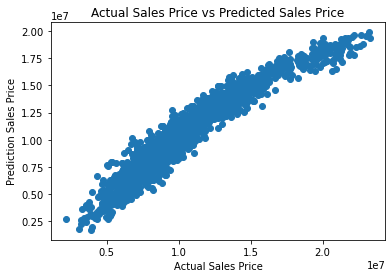

In [168]:
plt.scatter(y_test, y_pred_1)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

### 2) Lasso Regression

In [169]:
lasso=Lasso(alpha=0.001,max_iter=10000)

In [170]:
lasso.fit(X_train_s,y_train)

Lasso(alpha=0.001, max_iter=10000)

In [171]:
y_pred_las=lasso.predict(X_test_s)

#### Calculate R2 score

In [172]:
r2_score(y_test,y_pred_las)

0.9074862184082306

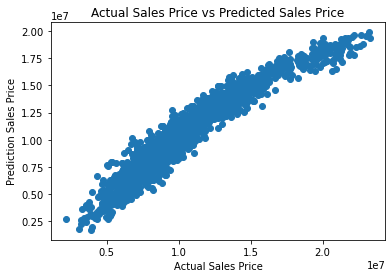

In [173]:
plt.scatter(y_test, y_pred_las)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

### 3) Ridge Regression

In [174]:
ridge=Ridge(alpha=0.0001)

In [175]:
ridge.fit(X_train_s,y_train)

Ridge(alpha=0.0001)

In [176]:
y_pred_r=ridge.predict(X_test_s)

#### Calculate R2 score

In [177]:
r2_score(y_test,y_pred_r)

0.9074862185793426

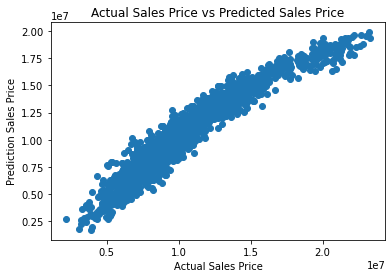

In [178]:
plt.scatter(y_test, y_pred_r)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

### 4) KNN Regressor


In [179]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model =KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_s, y_train)  #fit the model
    pred=model.predict(X_test_s) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1207863.4062840354
RMSE value for k=  2 is: 1062816.144342157
RMSE value for k=  3 is: 995406.1770410984
RMSE value for k=  4 is: 995213.2282522144
RMSE value for k=  5 is: 984472.9112932633
RMSE value for k=  6 is: 987137.0036874346
RMSE value for k=  7 is: 995654.2825838724
RMSE value for k=  8 is: 995715.9192527875
RMSE value for k=  9 is: 1004484.6702095554
RMSE value for k=  10 is: 1011617.4046925821
RMSE value for k=  11 is: 1017872.5319762345
RMSE value for k=  12 is: 1018053.6377845494
RMSE value for k=  13 is: 1026375.2324357232
RMSE value for k=  14 is: 1033247.6112718217
RMSE value for k=  15 is: 1046842.6053234045
RMSE value for k=  16 is: 1049295.675172873
RMSE value for k=  17 is: 1054472.8857846642
RMSE value for k=  18 is: 1061091.5670028483
RMSE value for k=  19 is: 1066007.6807365122
RMSE value for k=  20 is: 1070747.7067665225


<AxesSubplot:>

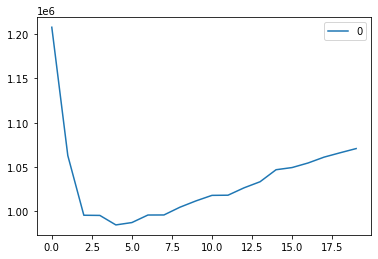

In [180]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [181]:

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
k=KNeighborsRegressor()
model = GridSearchCV(k, params, cv=5)
model.fit(X_train_s,y_train)
model.best_params_

{'n_neighbors': 4}

In [182]:
k=KNeighborsRegressor(n_neighbors = 4)

In [183]:
k.fit(X_train_s,y_train)

KNeighborsRegressor(n_neighbors=4)

In [184]:
y_pred_k=k.predict(X_test_s)

In [185]:
r2_score(y_test,y_pred_k)

0.9313187700258113

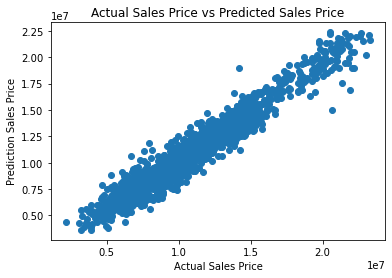

In [186]:
plt.scatter(y_test, y_pred_k)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

### 5) Decision Tree

In [187]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
    dt = DecisionTreeRegressor(max_depth=depth) 
    dt.fit(X_train_s,y_train)
    y_dt=dt.predict(X_test_s)
    print("max_depth",depth,"Score",r2_score(y_test,y_dt))

max_depth 1 Score 0.3611856861490069
max_depth 2 Score 0.6876586130263271
max_depth 3 Score 0.8076807266700543
max_depth 4 Score 0.8844321131887785
max_depth 5 Score 0.915718078188748
max_depth 6 Score 0.9392779506365974
max_depth 7 Score 0.9543142076295082
max_depth 8 Score 0.9627290646963049
max_depth 9 Score 0.9646334654989763
max_depth 10 Score 0.9646272043165323
max_depth 20 Score 0.9576928596216595
max_depth 40 Score 0.9577173632886727
max_depth 60 Score 0.9585234808152633


In [188]:
dt = DecisionTreeRegressor(max_depth=8) 
dt.fit(X_train_s,y_train)
y_dt=dt.predict(X_test_s)
print("max_depth",8,"Score",r2_score(y_test,y_dt))

max_depth 8 Score 0.9625795167479885


max_depth 8 gives 96.2% Accuracy

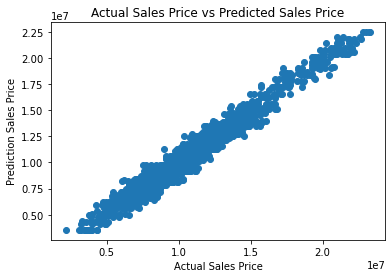

In [189]:
plt.scatter(y_test, y_dt)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

### 6) Bagging

In [190]:
bg=BaggingRegressor(base_estimator=dt)

In [191]:
bg.fit(X_train_s,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=8))

In [192]:
bg_pred=bg.predict(X_test_s)

In [193]:
r2_score(y_test,bg_pred)

0.9683075734420153

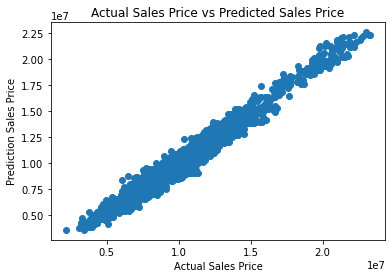

In [194]:
plt.scatter(y_test, bg_pred)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

### 6a) Random Forest

In [195]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
    rf = RandomForestRegressor(n_estimators= 100, max_depth = depth, max_features='sqrt')
    rf.fit(X_train_s,y_train);
    predictions = rf.predict(X_test_s)
    print("max_depth",depth,"Score",r2_score(y_test,predictions))

max_depth 1 Score 0.4261170763471306
max_depth 2 Score 0.6388421322591269
max_depth 3 Score 0.7592438055846723
max_depth 4 Score 0.868247534499224
max_depth 5 Score 0.9064386841553578
max_depth 6 Score 0.9293513892421101
max_depth 7 Score 0.9483922955688098
max_depth 8 Score 0.9578553215626816
max_depth 9 Score 0.9645589400414929
max_depth 10 Score 0.969140431279914


max_depth 10 gives 96.8% Accuracy


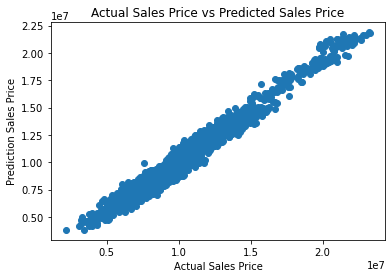

In [196]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

### 7) Boosting


#### 7a) AdaBoost 

In [197]:
ada=AdaBoostRegressor()

In [198]:
ada.fit(X_train_s,y_train)

AdaBoostRegressor()

In [199]:
ada_pred=ada.predict(X_test_s)

In [200]:
r2_score(y_test,ada_pred)

0.9265110972841386

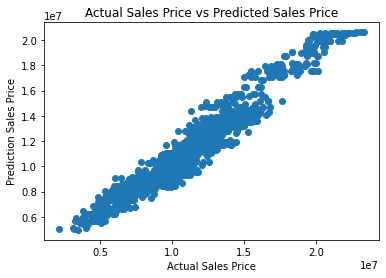

In [201]:
plt.scatter(y_test,ada_pred)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

#### 7b) Gradient Boosting

In [202]:
gb=GradientBoostingRegressor()

In [203]:
gb.fit(X_train_s,y_train)

GradientBoostingRegressor()

In [204]:
bg_pred=bg.predict(X_test_s)

In [205]:
r2_score(y_test,bg_pred)

0.9683075734420153

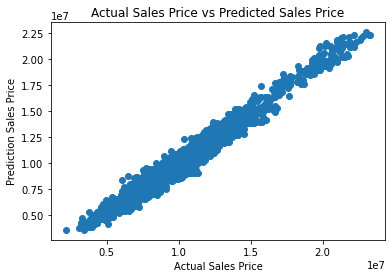

In [206]:
plt.scatter(y_test,bg_pred)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

#### 7c) eXtreme Gradient Boosting

In [207]:
xgb=XGBRegressor()

In [208]:
xgb.fit(X_train_s,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [209]:
xgb_pred=xgb.predict(X_test_s)

In [210]:
r2_score(y_test,xgb_pred)

0.9811267879891843

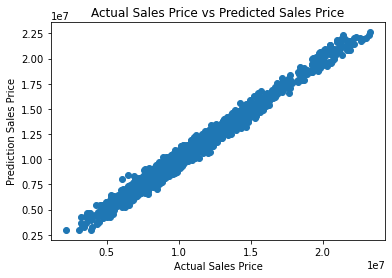

In [211]:
plt.scatter(y_test,xgb_pred)
plt.xlabel("Actual Sales Price")
plt.ylabel("Prediction Sales Price")
plt.title("Actual Sales Price vs Predicted Sales Price")
plt.show()

In [212]:
X.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'MZZONE', 'Depreciation_Year'],
      dtype='object')

In [213]:
coeff_df = pd.DataFrame(xgb.feature_importances_,['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'MZZONE', 'Depreciation_Year'], columns=['Feature Importance'])
coeff_df

,Feature Importance
AREA,0.288846
INT_SQFT,0.014076
DIST_MAINROAD,0.000491
N_BEDROOM,0.004231
N_BATHROOM,0.003829
N_ROOM,0.317739
SALE_COND,0.002065
PARK_FACIL,0.012912
BUILDTYPE,0.331921
UTILITY_AVAIL,0.001093


Features like BUILDTYPE,N_ROOM,AREA contribute majorly in predicting Sales Price

### Conclusion

**The Chennai_House_Predictions data set is a collection of 7109 houses sales records from 2004 to 2015 with 21 features.**

**In this context, all the above regression gives almost same performance except Vanila Linear, Lasso and Ridge Regression.  Vanila Linear, Lasso and Ridge Regression gives least r2_score i.e 90.74% among all the models. Most of the models give the r2_score around 96%. XGBoost Regressor manages to give highest r2_score among all i.e 98.11%.**

**Features like BUILDTYPE,N_ROOM,AREA contribute majorly in predicting Sales Price**

### Seller Point of View

**Number of Houses sold in T Nagar is less but average sales price is very high. So it we can say that houses in T Nagar are expensive**

**Commericial Buildings sales price are higher than other two.**

**After 2013, no houses with 2 bathroom were sold and houses with 1 bathroom are more sold than 2 bathroom.**

**Houses with 4 Rooms are sold almost in every area.**

### Buyer Point of View

**Houses in Karapakkam and Chormpet are more affordable when compared to other locality**

**Houses with 2 Bedrooms in areas like Karapakkam,Adyar,Chormpet,Velachery,KK Nagar are more affordable**
